In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

# Load your dataset
df = pd.read_csv('labelled_data.csv')

# Prepare text data
texts = df['Comment Text']
labels = df['Sentiment Label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer and transform the text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize and train the Random Forest classifier with progress bar
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
for _ in tqdm(range(1), desc="Training Progress"):
    classifier.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))


Training Progress: 100%|██████████| 1/1 [04:06<00:00, 246.76s/it]


              precision    recall  f1-score   support

         NEG       0.87      0.39      0.53      1045
         NEU       0.89      0.96      0.92     11197
         POS       0.88      0.81      0.85      4339

    accuracy                           0.88     16581
   macro avg       0.88      0.72      0.77     16581
weighted avg       0.88      0.88      0.88     16581



Learning Curves: 100%|██████████| 10/10 [41:51<00:00, 251.15s/it]


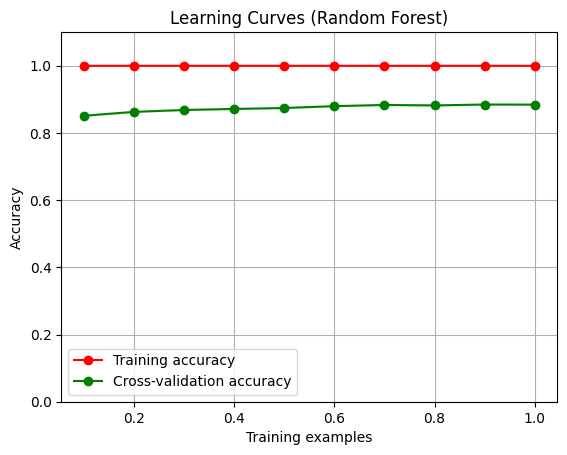

              precision    recall  f1-score   support

           0       0.87      0.39      0.53      1045
           1       0.89      0.96      0.92     11197
           2       0.88      0.81      0.85      4339

    accuracy                           0.88     16581
   macro avg       0.88      0.72      0.77     16581
weighted avg       0.88      0.88      0.88     16581



In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

# Load your dataset
df = pd.read_csv('labelled_data.csv')

# Prepare text data
texts = df['Comment Text']
labels = df['Sentiment Label']

# Map the sentiment labels to numerical values
label_mapping = {'NEG': 0, 'NEU': 1, 'POS': 2}
labels = labels.map(label_mapping)

# Split data
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer and transform the text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Random Forest classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Generate learning curves with progress bar
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores = []
test_scores = []

for train_size in tqdm(train_sizes, desc="Learning Curves"):
    X_train_subset = X_train_tfidf[:int(train_size * X_train_tfidf.shape[0])]
    y_train_subset = y_train[:int(train_size * y_train.shape[0])]
    classifier.fit(X_train_subset, y_train_subset)
    train_scores.append(classifier.score(X_train_subset, y_train_subset))
    test_scores.append(classifier.score(X_test_tfidf, y_test))

train_scores = np.array(train_scores).reshape(-1, 1)
test_scores = np.array(test_scores).reshape(-1, 1)

# Calculate mean and standard deviation for training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure()
plt.title("Learning Curves (Random Forest)")
plt.xlabel("Training examples")
plt.ylabel("Accuracy")
plt.ylim(0.0, 1.1)
plt.grid()

# Plot the average training and validation accuracy
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training accuracy")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation accuracy")

plt.legend(loc="best")
plt.show()

# Train the classifier on the entire training set
classifier.fit(X_train_tfidf, y_train)

# Predict and evaluate
y_pred = classifier.predict(X_test_tfidf)
print(classification_report(y_test, y_pred))
